In [60]:
import tensorflow as tf
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
import pickle
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report

### Load dataset


In [61]:
df=pd.read_csv('Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### Data preprocessing

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [63]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [64]:
df.drop(columns=["RowNumber","CustomerId","Surname"],inplace=True)

In [65]:
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [66]:
df.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [67]:
df["Exited"].value_counts()


Exited
0    7963
1    2037
Name: count, dtype: int64

In [68]:
df["Geography"].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [69]:
df["Gender"].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

### Split features and target


In [70]:
X=df.drop('Exited',axis=1)
y=df['Exited']

In [71]:
categorical_columns = X.select_dtypes(include=['object']).columns
numerical_columns = X.select_dtypes(include=['int64','float64']).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_columns),  
        ('num', MinMaxScaler(), numerical_columns)      
    ]
)

X = preprocessor.fit_transform(X)

columns = preprocessor.get_feature_names_out()
X = pd.DataFrame(X, columns=columns)



In [72]:
df.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [73]:
with open('preprocessor.pkl', 'wb') as f:
    pickle.dump(preprocessor, f)

### Train-test split


In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Handle imblance data


In [75]:

smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

print("Class distribution after SMOTE:", y_train.value_counts())

Class distribution after SMOTE: Exited
0    6356
1    6356
Name: count, dtype: int64


### Build the neural network model

In [76]:
model = Sequential([
    Dense(1000, input_shape=(X_train.shape[1],), activation='relu'),
    Dropout(0.5), 

    Dense(500, activation='relu'),
    Dropout(0.5),

    Dense(250, activation='relu'),
    Dropout(0.3), 

    Dense(1, activation='sigmoid')  
])

c:\Users\daniy\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [77]:
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 1000)           │        14,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 1000)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 500)            │       500,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 500)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 250)            │       125,250 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 250)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │           251 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 640,001 (2.44 MB)

 Trainable params: 640,001 (2.44 MB)

 Non-trainable params: 0 (0.00 B)

In [78]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [79]:
early_stopping = EarlyStopping(
    monitor='val_loss',  
    patience=5,          
    restore_best_weights=True  
)

In [80]:
history = model.fit(
    X_train, y_train,  
    validation_data=(X_test, y_test),  
    epochs=50,         
    batch_size=32,     
    callbacks=[early_stopping],  
    verbose=1           
)

Epoch 1/50
398/398 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.6366 - loss: 0.6364 - val_accuracy: 0.7515 - val_loss: 0.5203
Epoch 2/50
398/398 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.7263 - loss: 0.5384 - val_accuracy: 0.6870 - val_loss: 0.5946
Epoch 3/50
398/398 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.7567 - loss: 0.4958 - val_accuracy: 0.8000 - val_loss: 0.4554
Epoch 4/50
398/398 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.7747 - loss: 0.4671 - val_accuracy: 0.7350 - val_loss: 0.5309
Epoch 5/50
398/398 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.7784 - loss: 0.4628 - val_accuracy: 0.7995 - val_loss: 0.4552
Epoch 6/50
398/398 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.7789 - loss: 0.4633 - val_accuracy: 0.7795 - val_loss: 0.4723
Epoch 7/50
398/398 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.7882 - loss: 0.4518 - val_accuracy: 0.8075 - val_loss: 0.4224
Epoch 8/50
398/398 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.7935 - loss: 0.4469 - val_accuracy: 0

In [81]:
history.history.keys()


dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

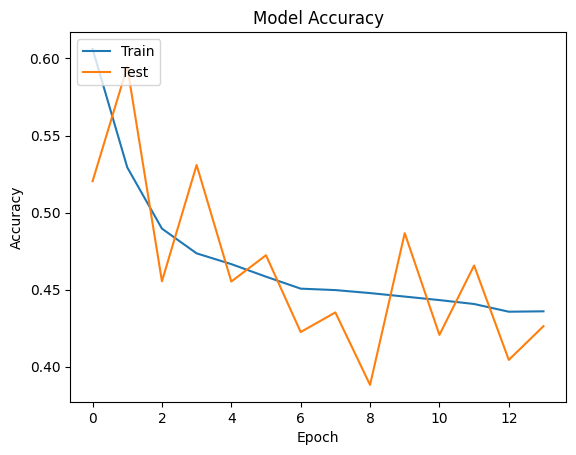

In [82]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

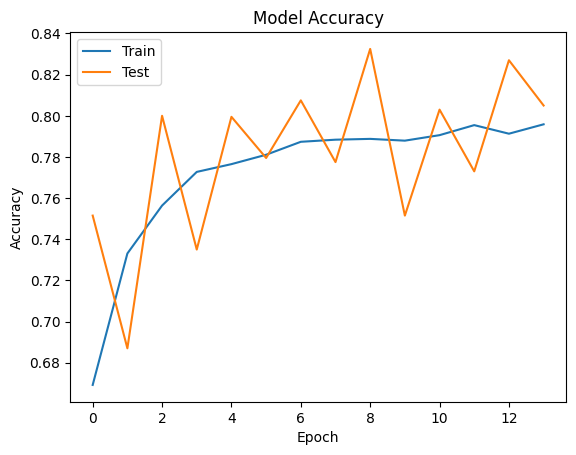

In [83]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [84]:
y_pred_probs = model.predict(X_test)  
y_pred = (y_pred_probs > 0.5).astype(int)  

accuracy=accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


report = classification_report(y_test, y_pred, target_names=['Class 0', 'Class 1'])
print("\nClassification Report:\n", report)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Accuracy: 0.83

Classification Report:
               precision    recall  f1-score   support

     Class 0       0.92      0.87      0.89      1607
     Class 1       0.56      0.68      0.61       393

    accuracy                           0.83      2000
   macro avg       0.74      0.77      0.75      2000
weighted avg       0.85      0.83      0.84      2000



In [85]:
model.save('customer_churn_model.keras')
print("Model saved successfully.")


Model saved successfully.


In [86]:
from keras.models import load_model

loaded_model = load_model('customer_churn_model.keras')
print("Model loaded successfully.")


Model loaded successfully.


### Prediction

In [90]:
with open('preprocessor.pkl', 'rb') as f:
    preprocessor = pickle.load(f)

model = load_model('customer_churn_model.keras')

new_data = pd.DataFrame({
    'Gender': ['Female'],         
    'Geography': ['France'],      
    'CreditScore': [600],         
    'Age': [35],                  
    'Tenure': [5],                
    'Balance': [50000],           
    'NumOfProducts': [2],         
    'HasCrCard': [1],             
    'IsActiveMember': [1],        
    'EstimatedSalary': [70000]    
})

new_data_transformed = preprocessor.transform(new_data)

prediction_probs = model.predict(new_data_transformed)
prediction = (prediction_probs > 0.5).astype(int)

result = "Exited" if prediction[0][0] == 1 else "Stayed"
print(f"Prediction: {result}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step
Prediction: Stayed
